GRIP Task-2

Prediction Using Unsupervised Learning

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [8]:
Iris =pd.read_csv('Iris.csv')
Iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [9]:
x=Iris.iloc[:, [1,4]].values

C:\Users\JAYA\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\JAYA\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\JAYA\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\JAYA\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explic

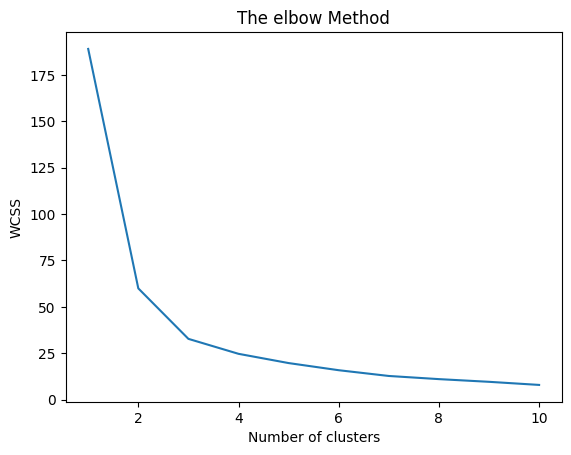

In [10]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init ='k-means++', random_state =42) # We use k-means++ to avoid the random initialization trap
    kmeans.fit(x)
    wcss.append(kmeans.inertia_) # kmeans.inertia_ returns the WCSS value for an initialized cluster
plt.plot(range(1, 11), wcss)
plt.title('The elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [11]:
kmeans = KMeans(n_clusters = 3, init ='k-means++', random_state = 42)
y_kmeans=kmeans.fit_predict(x)

C:\Users\JAYA\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [12]:
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 1 2 2 1 2 2 2 2 0 2 2 2 2 2 2 2 2
 2 0 0 0 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 1 2 2 2 2 1 2 0 2 0 2 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 2 0 0 0 2 0 0 0 2 0 0 0 0 0
 0 2]


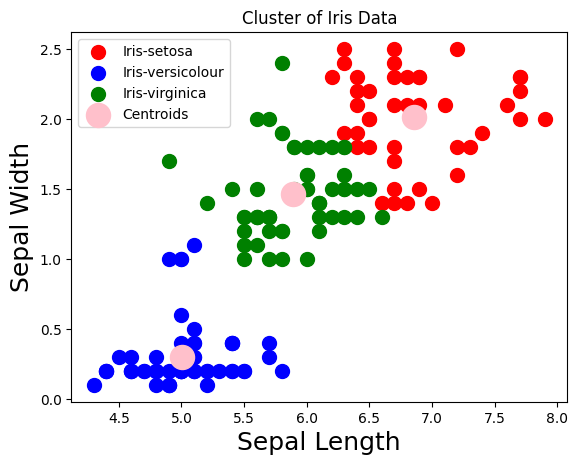

In [13]:
plt.scatter(x[y_kmeans ==0, 0], x[y_kmeans==0, 1], s=100, c='red', label ='Iris-setosa')
plt.scatter(x[y_kmeans ==1, 0], x[y_kmeans==1, 1], s=100, c='blue', label ='Iris-versicolour')
plt.scatter(x[y_kmeans ==2, 0], x[y_kmeans==2, 1], s=100, c='green', label ='Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='pink', label ='Centroids')
plt.title('Cluster of Iris Data')
plt.xlabel('Sepal Length', fontsize =18)
plt.ylabel('Sepal Width', fontsize =18)
plt.legend()
plt.show()